# Prediction Using Supervise Machine LearningTechnique

## Author - Mrityunjay Srivastava

##### Problem Statement :- Predict the percentage of an student based on the no. of study hours.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
# filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

## Reading The Data For Further Analysis

In [3]:
# Loading the CSV data into a DataFrame df
df = pd.read_csv(r'C:\Users\mrity\OneDrive\Desktop\TSF\Task1\task1-dataset.csv', delimiter=',')
print("Data is imported successfully")


Data is imported successfully


## Exploratory Data Analysis

In [4]:
#Checking the data dimensions
df.shape

(25, 2)

In [5]:
#checking for unique values
df.nunique()

Hours     23
Scores    23
dtype: int64

In [6]:
#head of the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
#checking for data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
# Checking the column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# Checking for missing values if any
df.isnull().sum().sort_values(ascending=False)

Hours     0
Scores    0
dtype: int64

In [10]:
# Summary of all numerical data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


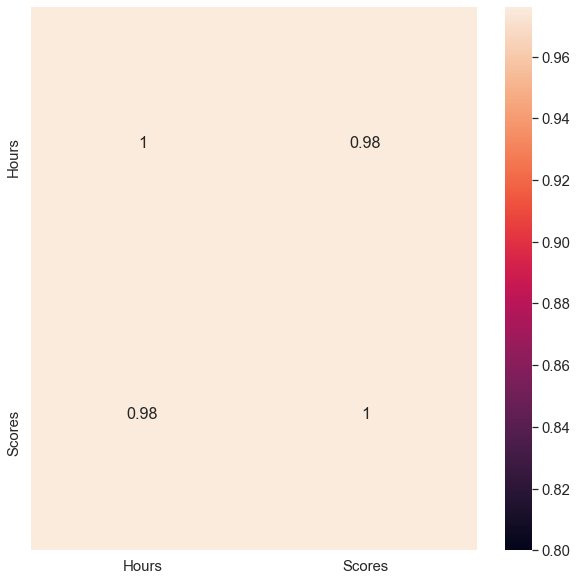

In [11]:
# Showing correlation between the variables
dataset=df.iloc[:,[0,1]]
Co=dataset.corr()
display(Co)
# Plotting the correlation matrix using heatmap
sns.set(font_scale=1.35)
f, ax = plt.subplots(figsize=(10,10))
hm=sns.heatmap(Co, annot = True,vmax=.8)

## Checking For Outliers

Text(0.5, 0, 'Scores')

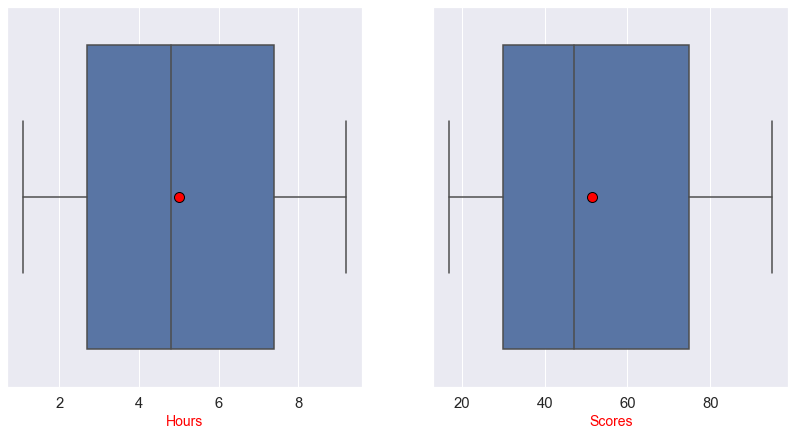

In [12]:
plt.figure(figsize=[14,7])
plt.subplot(1,2,1)
sns.boxplot(df['Hours'],showmeans=True,meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black","markersize":"10"})
plt.xlabel('Hours', fontdict={'color':'red','fontsize':14})

plt.subplot(1,2,2)
sns.boxplot(df['Scores'],showmeans=True,meanprops={"marker":"o","markerfacecolor":"red", "markeredgecolor":"black","markersize":"10"})
plt.xlabel('Scores', fontdict={'color':'red','fontsize':14})

There is no missing or null value and outliers are also not present.Hence we don't need to do data preprocessing

## Data Visualization

Text(0.5, 1.0, 'SCORES AND HOURS RELATIONSHIP')

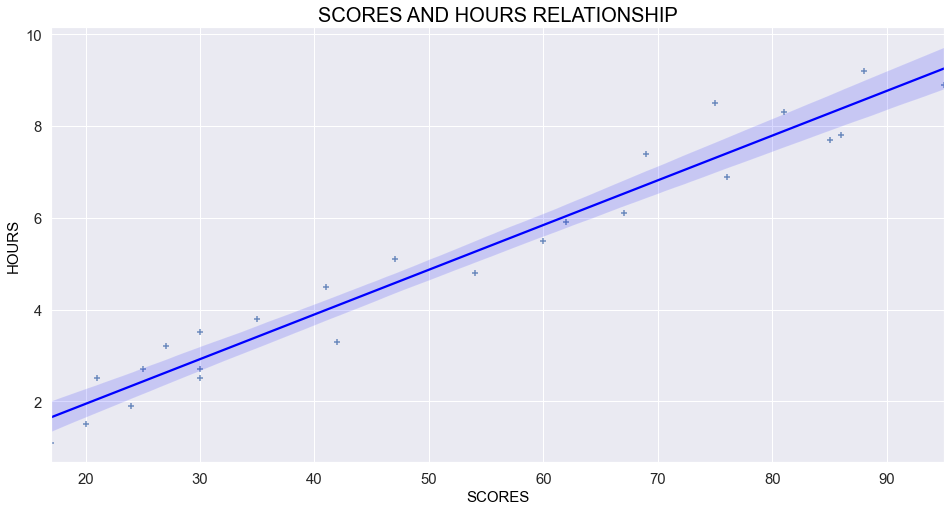

In [15]:
#using scatterplot for visualizing data
plt.figure(figsize=[16,8])
sns.regplot(x=df['Scores'],y=df['Hours'],line_kws={"color": "blue"},marker='+')
plt.xlabel("SCORES",fontdict={'color':'black','fontsize':15})
plt.ylabel("HOURS",fontdict={'color':'black','fontsize':15})
plt.title("SCORES AND HOURS RELATIONSHIP",fontdict={'color':'black','fontsize':20})

## Splitting data for training and testing

In [19]:
# Splitting the dataset into the Training set and Test set
Y= df.iloc[:,1] 
X= df.iloc[:,0] 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=0)

Splitting data into 70% for training and 30% for testing.

## Model Building

In [20]:
# Fitting Multiple Linear Regression to Training data
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
X_train = np.array([X_train])
X_train=X_train.reshape(-1,1)
regressor.fit(X_train, Y_train) 

print("Training done")



Training done


In [21]:
# Prediction
X_test = np.array([X_test])
X_test=X_test.reshape(-1,1)
y_pred = regressor.predict(X_test)
y_pred_data=pd.DataFrame(y_pred)

In [26]:
regressor.score(X_train,Y_train)


0.9484997422695115

In [25]:
regressor.score(X_test,Y_test)

0.9568211104435257

In [27]:
regressor.coef_

array([9.78856669])

#### What will be predicted score if a student studies for 9.25 hrs/day?

In [28]:
hours = 9.25
hours = np.array([hours])
hours = hours.reshape(-1, 1)
own_pred = regressor.predict(hours)
print("Hours studied = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Hours studied = [[9.25]]
Predicted Score = 92.91505723477056


## Model Statistics

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)
X_train_d=pd.DataFrame(X_train)
model=sm.OLS(Y_train,X_train).fit() 
y_pred=model.predict(X_test) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     353.5
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           2.79e-13
Time:                        00:53:48   Log-Likelihood:                -62.686
No. Observations:                  20   AIC:                             129.4
Df Residuals:                      18   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0182      3.057      0.660      0.517      -4.404       8.441
Hours          9.9107      0.527     18.802      0.000       8.803      11.018
==============================================================================
Omnibus:                        4.659   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                1.720
Skew:                          -0.296   Prob(JB):                        0.423
Kurtosis:                       1.691   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

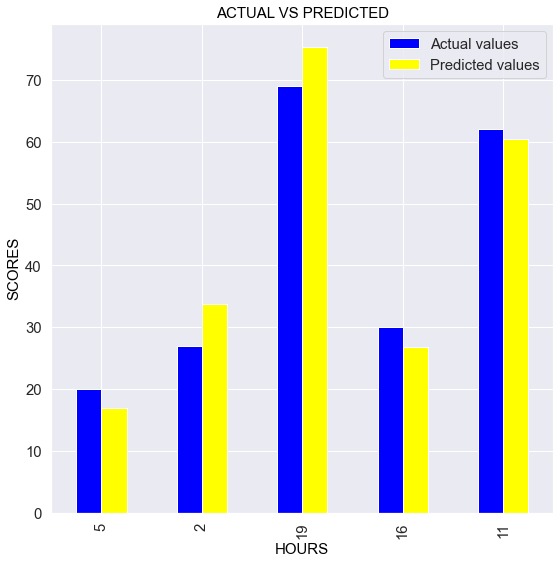

array([3.11585524, 6.73226078, 6.357018  , 3.20519876, 1.50896672])

In [35]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
result = pd.DataFrame({'Actual values':Y_test,'Predicted values':y_pred})
result.plot.bar(color=['blue','yellow'],figsize=(9,9))
plt.xlabel("HOURS",fontdict={'color':'black','fontsize':15})
plt.ylabel("SCORES",fontdict={'color':'black','fontsize':15})
plt.title("ACTUAL VS PREDICTED",fontdict={'color':'black','fontsize':15})
plt.show()

diff = np.array(np.abs(Y_test-y_pred))
diff



## Model Evaluation

In [41]:
from sklearn import metrics  
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred)) 

MAE: 4.1838598990029805


In [46]:
from sklearn import metrics  
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))

MSE: 21.59876930721748


In [45]:
from sklearn.metrics import r2_score
print('R-Squared:' , r2_score(Y_test,y_pred))

R-Squared: 0.9454906892105354


In [50]:
def MAPE(actual,pred):
    actual,pred=np.array(actual),np.array(pred)
    mape=np.mean(np.abs((actual-pred)/actual))*100
    return mape

m=MAPE(Y_test,y_pred)
print('MAPE:', m)

MAPE: 12.56889161704568


# Conclusion

MAE and MSE shows there is less errors in this model because predicted and actual values are  nearly same.

R-Squared very close to 1 so it's a good fit

MAPE is low so it's a good model